Here is an example of the nonlinear matching pursuit (NMP) algorithm designed by Prof. Hou and Prof. Shi described here
http://users.cms.caltech.edu/~hou/papers/Data_driven_TF_analysis_published.pdf

We gratefully thank Prof. Hou and Prof. Shi for providing the correspondi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi
from numpy import pi as π
from Decompose_MP_periodic_sym import Decompose_MP_periodic_sym

# Get color scheme
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

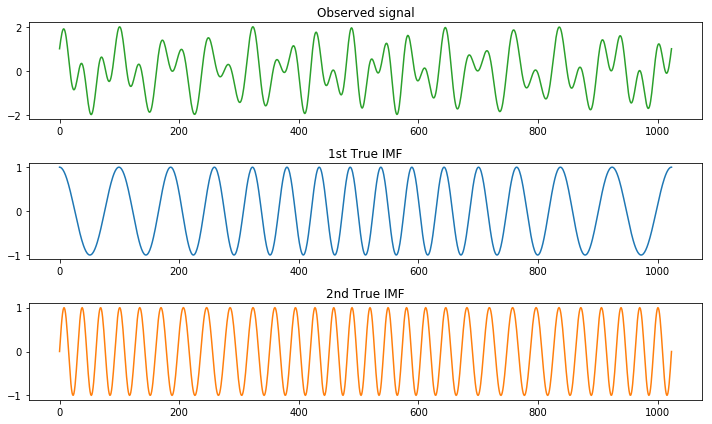

In [17]:
N = 1024
t=np.linspace(0,1,N)

# Construct source signals 
s1 = cos(30*π*t-5*sin(2*π*t))
s2 = sin(60*π*t+2*sin(4*π*t))

# Observed signal
f = s1 + s2

# Initial guess for θ
theta_ini_1 = 30*π*t
theta_ini_2 = 60*π*t

plt.figure('Original signals',figsize=(10,6))
plt.subplot(3,1,1)
plt.title('Observed signal')
plt.plot(f,colors[2])
plt.subplot(3,1,2)
plt.title('1st True IMF')
plt.plot(s1,colors[0])
plt.subplot(3,1,3)
plt.title('2nd True IMF')
plt.plot(s2,colors[1])
plt.tight_layout()
plt.show()

In [3]:
# Extract first IMF
IMF1,θ1,ϕ1,dθ1 = Decompose_MP_periodic_sym(f,theta_ini_1)

# Extract second IMF
IMF2,θ2,ϕ2,dθ2 = Decompose_MP_periodic_sym(f-IMF1,theta_ini_2)

# Compute residual
residual = f - IMF1 - IMF2

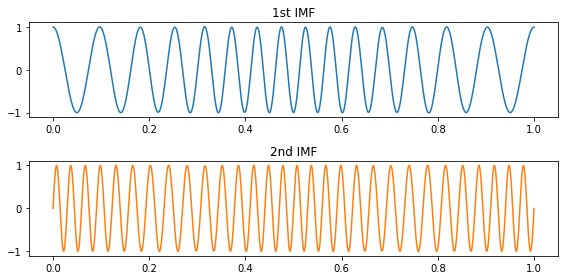

In [4]:
plt.figure('IMFs',figsize=(8,4))
plt.subplot(2,1,1)
plt.plot(t,IMF1,colors[0])
plt.title('1st IMF')
plt.subplot(2,1,2)
plt.title('2nd IMF')
plt.plot(t,IMF2,colors[1])
plt.tight_layout()
plt.show()

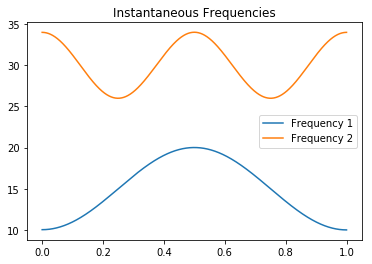

In [5]:
# Plot the instantaneous frequency dθ/dt * 1/2π
plt.figure('Instantaneous Frequency')
plt.plot(t,dθ1/(2*π),label='Frequency 1',color=colors[0])
plt.plot(t,dθ2/(2*π),label='Frequency 2',color=colors[1])
plt.legend()
plt.title('Instantaneous Frequencies')
plt.show()